<a href="https://colab.research.google.com/github/adifatol/BIQA/blob/master/patchScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utils

In [19]:
!ls blur

1600.BLUR.1.png		   log_seaside.BLUR.1.png
1600.BLUR.2.png		   log_seaside.BLUR.2.png
1600.BLUR.3.png		   log_seaside.BLUR.3.png
1600.BLUR.4.png		   log_seaside.BLUR.4.png
1600.BLUR.5.png		   log_seaside.BLUR.5.png
aerial_city.BLUR.1.png	   monument.BLUR.1.png
aerial_city.BLUR.2.png	   monument.BLUR.2.png
aerial_city.BLUR.3.png	   monument.BLUR.3.png
aerial_city.BLUR.4.png	   monument.BLUR.4.png
aerial_city.BLUR.5.png	   monument.BLUR.5.png
boston.BLUR.1.png	   native_american.BLUR.1.png
boston.BLUR.2.png	   native_american.BLUR.2.png
boston.BLUR.3.png	   native_american.BLUR.3.png
boston.BLUR.4.png	   native_american.BLUR.4.png
boston.BLUR.5.png	   native_american.BLUR.5.png
bridge.BLUR.1.png	   redwood.BLUR.1.png
bridge.BLUR.2.png	   redwood.BLUR.2.png
bridge.BLUR.3.png	   redwood.BLUR.3.png
bridge.BLUR.4.png	   redwood.BLUR.4.png
bridge.BLUR.5.png	   redwood.BLUR.5.png
butter_flower.BLUR.1.png   roping.BLUR.1.png
butter_flower.BLUR.2.png   roping.BLUR.2.png
butter_flower.BLUR.3.png 

# Upload Images

shows a dialog to upload new images

option to download the CSIQ Image Quality Database

In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [21]:
!wget http://vision.eng.shizuoka.ac.jp/csiq/src_imgs.zip
!wget http://vision.eng.shizuoka.ac.jp/csiq/dst_imgs.zip
  
!unzip -n src_imgs.zip
!unzip -n dst_imgs.zip

--2019-04-15 10:53:26--  http://vision.eng.shizuoka.ac.jp/csiq/src_imgs.zip
Resolving vision.eng.shizuoka.ac.jp (vision.eng.shizuoka.ac.jp)... 133.70.150.170
Connecting to vision.eng.shizuoka.ac.jp (vision.eng.shizuoka.ac.jp)|133.70.150.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14455692 (14M) [application/zip]
Saving to: ‘src_imgs.zip.1’

src_imgs.zip.1      100%[===================>]  13.79M  9.87MB/s    in 1.4s    

2019-04-15 10:53:27 (9.87 MB/s) - ‘src_imgs.zip.1’ saved [14455692/14455692]

--2019-04-15 10:53:30--  http://vision.eng.shizuoka.ac.jp/csiq/dst_imgs.zip
Resolving vision.eng.shizuoka.ac.jp (vision.eng.shizuoka.ac.jp)... 133.70.150.170
Connecting to vision.eng.shizuoka.ac.jp (vision.eng.shizuoka.ac.jp)|133.70.150.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374383009 (357M) [application/zip]
Saving to: ‘dst_imgs.zip.1’

dst_imgs.zip.1      100%[===================>] 357.04M  11.2MB/s    in 32s     

2019-0

# Load Images in colab

loads images of a certain SHAPE into runtime memory

In [22]:

import os

# List Image Names
# Parses each file name of format <NAME>.png
# TODO: support for other extensions?
def image_list( ext = '.png'):
  names = {}
  for f in [file for file in os.listdir() if file.endswith(ext)]:
    fname = os.path.splitext(f)[0]
    names[fname] = 1
  return list(names.keys())

img_list = image_list()
print('Images found: ', img_list)

Images found:  ['lake', 'butter_flower', 'fisher', 'woman', 'child_swimming', 'boston', '1600', 'aerial_city', 'bridge', 'monument', 'family', 'sunset_sparrow', 'lady_liberty', 'veggies', 'native_american', 'log_seaside', 'sunsetcolor', 'rushmore', 'redwood', 'cactus', 'snow_leaves', 'turtle', 'couple', 'foxy', 'swarm', 'roping', 'geckos', 'trolley', 'shroom', 'elk']


In [23]:

# Load the images
# Encode them into jpg

DISTORT = ['blur','contrast','fnoise', 'jpeg', 'jpeg2000']
DISTORT_EXT = ['BLUR','contrast','fnoise', 'JPEG', 'jpeg2000']
Q_LEVELS = ['1','2','3','4','5']

from random import randint
import numpy as np
import cv2

#TODO support for nItems = 'ALL'
#TODO support various loading order (randomize?)
def load_imgs(img_list, nItems = 5):
  images = {}
  images['orig'] = []
  for dist in DISTORT:
    images[dist] = {}
    for qlvl in Q_LEVELS:
      images[dist][qlvl] = []

  for f in range(0,nItems):
    fname = img_list[f]
    original = fname+'.png'
    img_data = cv2.imread(original)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
    images['orig'].append(img_data)
    for dist, d_ext in zip(DISTORT, DISTORT_EXT):
      for qlvl in Q_LEVELS:
        f_path = dist+'/'+fname+'.'+d_ext+'.'+qlvl+'.png'
        img_data = cv2.imread(f_path)
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        images[dist][qlvl].append(img_data)
  return images

images = load_imgs(img_list, 3)

print("Nr of img:",len(images['orig']))


Nr of img: 3


In [0]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_all(arr_of_images, patch_estimator=False):
  columns = 5
  spacing = 14.75
  minorLocator = MultipleLocator(spacing)
  fig = plt.figure(figsize=(20,10))
  for i, image in enumerate(arr_of_images):
    ax = fig.add_subplot(len(images) / columns + 1, columns, i + 1)
    if patch_estimator:
      ax.yaxis.set_minor_locator(minorLocator)
      ax.xaxis.set_minor_locator(minorLocator)
      ax.grid(which = 'minor')
    plt.imshow(image)
  plt.show()


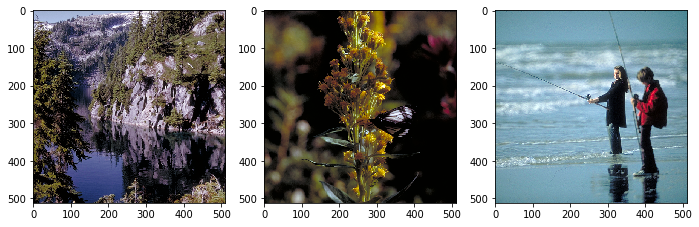

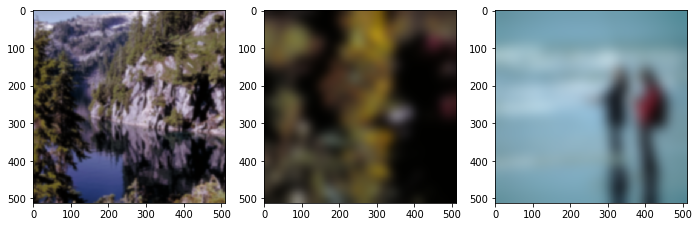

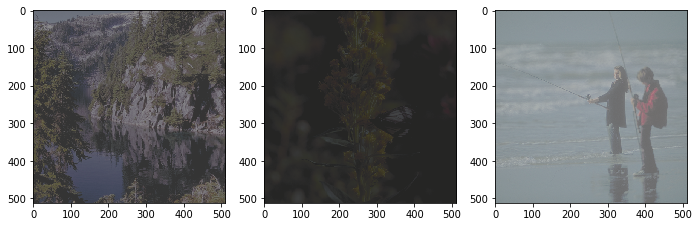

In [25]:
#Print some stats

rand_idx = randint(0, len(images['orig'])-3)
plot_all(images['orig'][rand_idx:rand_idx+3])
plot_all(images['blur']['5'][rand_idx:rand_idx+3])
plot_all(images['contrast']['5'][rand_idx:rand_idx+3])


# Score Images

apply the method suggested in [Learning without Human Scores for Blind Image Quality Assessment](https://www.cv-foundation.org/openaccess/content_cvpr_2013/papers/Xue_Learning_without_Human_2013_CVPR_paper.pdf)

## Extract Patches and calculate {SSIM} score

In [26]:
!pip install tqdm

In [27]:
from skimage.measure import compare_ssim
from skimage.util.shape import view_as_windows
from tqdm import tqdm

WH=15
WINDOW_SHAPE = (WH,WH,3)
PATCH_COUNT = 1156 #TODO this should be automated somehow

def plot_patches(patches):
  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 1
  rows = 1
  for i in range(1, columns*rows +1):
      img = patches[i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

def extract_patches(img):
  patches = np.squeeze(view_as_windows(img, WINDOW_SHAPE,step=WH))
  patches = np.reshape(patches,(-1,15,15,3))
  return patches

dim_len, dim_dist, dim_q = len(images['orig']), len(DISTORT), len(Q_LEVELS);
test_len = dim_len

one_score = [[np.zeros(PATCH_COUNT) for x in range(dim_dist)] for y in range(dim_q)]
scores = [np.copy(one_score) for x in range(test_len)]
all_patches = []

for i in tqdm(range(len(images['orig'][:test_len]))):
  img = images['orig'][i]
  orig_patches = extract_patches(img)
  for idist, dist in enumerate(DISTORT):
    for iqlvl, qlvl in enumerate(Q_LEVELS):
      dist_img = images[dist][qlvl][i]
      distorted_patches = extract_patches(dist_img)
      local_scores = np.zeros(PATCH_COUNT)
      local_patches = []
      for j in range(PATCH_COUNT):
        orig_patch = orig_patches[j]
        dist_patch = distorted_patches[j]
        (score, diff) = compare_ssim(orig_patch, dist_patch, full=True, multichannel=True)
        local_scores[j] = score
        all_patches.append(dist_patch)
      scores[i][idist][iqlvl] = np.copy(local_scores)

#   plot_patches(orig_patches)
#   for patch in orig_patches:
#   (score, diff) = compare_ssim(dist_img, img, full=True, multichannel=True)
#   diff = (diff * 255).astype("uint8")
#   print("___")
#   print("SSIM: {}".format(score))


100%|██████████| 3/3 [01:12<00:00, 24.16s/it]


## Calculate the C constant (![alt text](https://latex.codecogs.com/gif.latex?c%20%3D%20%5Cfrac%7B%5Csum%20_%7Bi%5Cepsilon%20%5COmega%7DS_%7Bi%7D%20%7D%7B10*%5Csum%20_%7Bi%5Cepsilon%20%5COmega_%7Bp%7D%7DS_%7Bi%7D%7D))

In [0]:
def the_C_constant(batch):
  all_sum = sum(batch)
  percentile10 = np.percentile(batch,10)
  omega_p_sum = sum([i for i in batch if i <= percentile10])
  c = all_sum / (10 * omega_p_sum)
  return c
# the_C_constant(scores[0][0][0])

## Histograms for scores

(3, 5, 5, 1156)
1.954233755168825
comparing for 1
(img-1 dist-2 qual-2)
[0.63300435 0.68861267 0.61698295 ... 0.42053275 0.27145359 0.53781346]


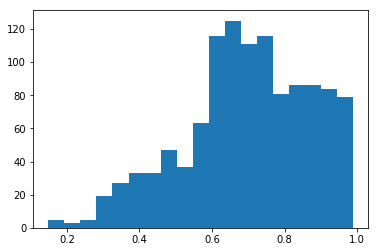

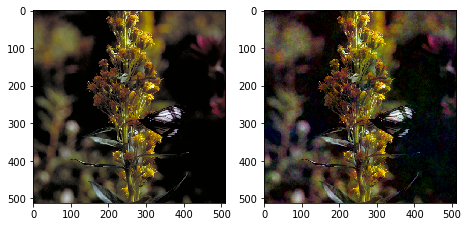

In [29]:
#Random scores visualisations

from mpl_toolkits.mplot3d import Axes3D

def histogram(img_idx, img_dist, img_qual):
  print("comparing for {}".format(img_idx))
  print("(img-{} dist-{} qual-{})".format(img_idx, img_dist, img_qual))
  print(scores[img_idx][img_dist][img_qual])
  plt.hist(scores[img_idx][img_dist][img_qual], bins='auto')
  plt.show()

ri = randint(0,dim_len-1)
rd = randint(0,dim_dist-1)
rq = randint(0,dim_q-1)

print(np.array(scores).shape)

for i in range(ri,ri+1):
  for d in range(rd,rd+1):
    for q in range(rq,rq+1):
      c = the_C_constant(scores[i][d][q])
      print(c)
      histogram(ri,rd,rq)
      plot_all([images['orig'][i],images[DISTORT[rd]][Q_LEVELS[rq]][ri]])


## Normalize scores

In [0]:
norm_scores = np.copy(scores)
all_scores = []
for i in range(0,dim_len):
  for d in range(0,dim_dist):
    for q in range(0,dim_q):
      c = the_C_constant(scores[i][d][q])
      norm_scores[i][d][q][:] = [x / c for x in norm_scores[i][d][q]]
      all_scores.extend(norm_scores[i][d][q])


(img-1 dist-fnoise qual-3)


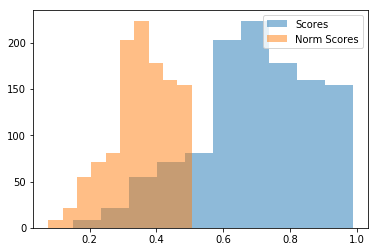

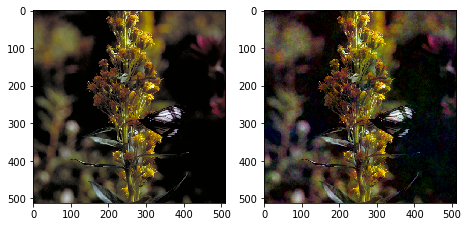

In [31]:
print("(img-{} dist-{} qual-{})".format(ri, DISTORT[rd], Q_LEVELS[rq]))

plt.hist(scores[ri][rd][rq], alpha=0.5, label='Scores')
plt.hist(norm_scores[ri][rd][rq], alpha=0.5, label='Norm Scores')
plt.legend(loc='upper right')
plt.show()

plot_all([images['orig'][ri],images[DISTORT[rd]][Q_LEVELS[rq]][ri]])

## Score QAC - Quality Aware Clusters

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
(3, 5, 5, 1156)
(3, 5, 5, 1156)


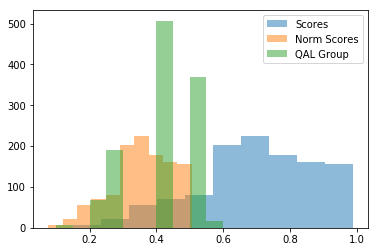

In [32]:
# Define The Score Levels used in QAC

L = 10
Gl = list(range(1,L+1))
Gl[:] = [x / L for x in Gl]


one_group = [[np.zeros(PATCH_COUNT) for x in range(dim_dist)] for y in range(dim_q)]
G = [np.copy(one_group) for x in range(dim_len)]

print(Gl)
print(np.array(G).shape)
print(np.array(norm_scores).shape)

# for i in range(0,dim_len):
#   for d in range(0,dim_dist):
#     for q in range(0,dim_q):
for i in range(ri,i+1):
  for d in range(rd,rd+1):
    for q in range(rq,rq+1):
      for p,score in enumerate(norm_scores[i][d][q]):
        for score_l in Gl:
          if score <= score_l:
            G[i][d][q][p] = score_l
            break

plt.hist(scores[ri][rd][rq], alpha=0.5, label='Scores')
plt.hist(norm_scores[ri][rd][rq], alpha=0.5, label='Norm Scores')
plt.hist(G[ri][rd][rq], alpha=0.5, label='QAL Group')
plt.legend(loc='upper right')
plt.show()

## High pass filter - Differenceof Gaussian (DoG) ( ![alt text]( https://latex.codecogs.com/gif.latex?h_%7B%5Csigma%20%7D%28r%29%3D1_%7Br%3D0%20%7D-%5Cfrac%7B1%7D%7B%5Csqrt%7B2%5Cpi%20%5Csigma%20%7D%7Dexp%28-%5Cfrac%7Br%5E%7B2%7D%7D%7B2%5Csigma%20%5E%7B2%7D%7D%29) )

### Extract the main features of a patch (DoG)

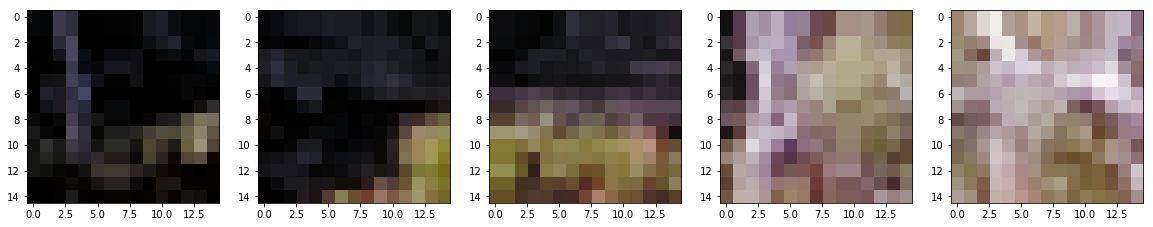

<function matplotlib.pyplot.show>

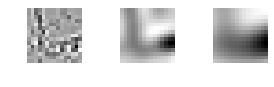

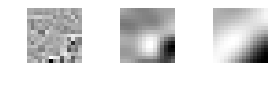

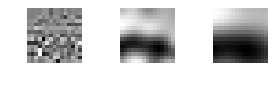

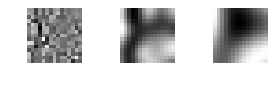

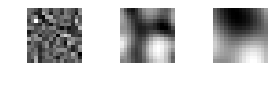

In [33]:
from skimage import filters, color

patch_count = 5
img = images['orig'][0]
orig_patches = extract_patches(img)
rand_patch = randint(0, len(orig_patches)-5)
# rand_patch = 0
plot_all(orig_patches[rand_patch:rand_patch+patch_count])

def dog(patch, sigma):
  k = 1.6
  s1 = filters.gaussian(patch,k*sigma)
  s2 = filters.gaussian(patch,sigma)
  # multiply by sigma to get scale invariance
  dog = s1 - s2
  return dog

def dog_plot(patch, i):
  gray_patch = color.rgb2gray(patch)
  rows = patch_count
  cols = 3 # len(enumerate[ sigmas ])
  fig = plt.figure(figsize=(5,5))
  for idx,sigma in enumerate([0.2, 2.0, 4.0]):
    pos = i * cols + idx+1
    filtered = dog(gray_patch, sigma)
    ax = fig.add_subplot(rows,cols,pos)
    fig.subplots_adjust(hspace=0, wspace=0)
    ax.set_aspect('equal')
    plt.axis("off")
    plt.imshow(filtered,cmap='gray')

for i in range(0, patch_count):
  dog_plot(orig_patches[rand_patch+i], i)
plt.show

(3, 5, 5, 1156)
86700
86700
0.8952696517584849
0.9107074029893101
0.16929094284873936
0.5311722168833934
0.022388701200851197


<function matplotlib.pyplot.show>

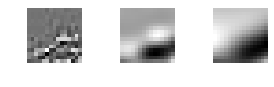

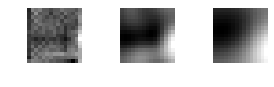

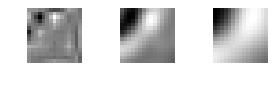

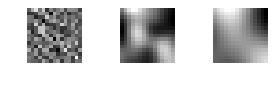

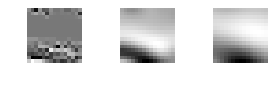

In [34]:
print(norm_scores.shape)
print(len(all_patches))
print(len(all_scores))

for i in range(0, 5):
  rand_patch = randint(0, len(all_patches))
  dog_plot(all_patches[rand_patch], i)
  print(all_scores[rand_patch])
plt.show


### Extract DoG for all patches

In [35]:
#Sigmas: [0.2, 2.0, 4.0]

def all_filtered_patches(all_patches, sigma):
  all_filtered = []
  for i in tqdm(range(len(all_patches))):
    patch = all_patches[i]
    gray_patch = color.rgb2gray(patch)
    filtered = dog(gray_patch, sigma)
    all_filtered.append(filtered)
  return all_filtered
filtered_02 = all_filtered_patches(all_patches, 0.2)
filtered_20 = all_filtered_patches(all_patches, 2.0)
filtered_40 = all_filtered_patches(all_patches, 4.0)
    
  

100%|██████████| 86700/86700 [00:52<00:00, 1638.50it/s]


### Save the DoG together with the scores

In [0]:
# Save in VM

import pickle

with open('filtered_02.pkl', 'wb') as handle:
    pickle.dump(filtered_02, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filtered_20.pkl', 'wb') as handle:
    pickle.dump(filtered_02, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filtered_40.pkl', 'wb') as handle:
    pickle.dump(filtered_02, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('all_scores.pkl', 'wb') as handle:
    pickle.dump(all_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': "1Iu9bS-fovG20py9_9A2-M7BJ56HG-sNB"}]})
file.SetContentFile('filtered_02.pkl')
file.Upload()
file = drive.CreateFile({'parents':[{u'id': "1Iu9bS-fovG20py9_9A2-M7BJ56HG-sNB"}]})
file.SetContentFile('filtered_20.pkl')
file.Upload()
file = drive.CreateFile({'parents':[{u'id': "1Iu9bS-fovG20py9_9A2-M7BJ56HG-sNB"}]})
file.SetContentFile('filtered_40.pkl')
file.Upload()
file = drive.CreateFile({'parents':[{u'id': "1Iu9bS-fovG20py9_9A2-M7BJ56HG-sNB"}]})
file.SetContentFile('all_scores.pkl')
file.Upload()